# API-201 ABC REVIEW SESSION #9

**Friday, December 2**

# Table of Contents
1. [Exercise 1 - Dplyr functions](#Exercise1)
2. [Exercise 2 - Dplyr functions](#Exercise5)
3. [Exercise 3 - Bayes Rule](#Exercise2)
4. [Exercise 4 - Discrete random variables](#Exercise3)
5. [Exercise 5 - Continuous random variables](#Exercise4)
6. [Exercise 6 - Decision tree](#Exercise6)

# Exercise 1 - Dplyr functions

Just like we did in the R primers, for this exercise we are going to use full baby name data provided by the SSA. This includes all names with at least 5 uses. `babynames` is a data frame with five variables: `year`, `sex`, `name`, `n` and `prop` (n divided by total number of applicants in that year, which means proportions are of people of that sex with that name born in that year).

In [59]:
# install.packages("babynames")
library(tidyverse)
library(babynames)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



**1. Examine the first ten rows of data. What is the unit of analysis of this dataset?**

In [21]:
# Your answer here!

# START

head(babynames, 10)

# END

year,sex,name,n,prop
<dbl>,<chr>,<chr>,<int>,<dbl>
1880,F,Mary,7065,0.07238359
1880,F,Anna,2604,0.02667896
1880,F,Emma,2003,0.02052149
1880,F,Elizabeth,1939,0.01986579
1880,F,Minnie,1746,0.01788843
1880,F,Margaret,1578,0.01616720
1880,F,Ida,1472,0.01508119
1880,F,Alice,1414,0.01448696
1880,F,Bertha,1320,0.01352390


**2. What were the five most popular girl names in 2000? Report the number of babies.** \
*Hint: these are the steps to follow: \
a. Filter babynames to just girls born in 2000. \
b. Select the name and n columns from the result. \
c. Arrange those columns so that the most popular names appear near the top.*

In [28]:
# Your answer here!

# START

babynames %>%
    filter(year == 2000 & sex == "F") %>%
    select(name, n) %>%
    arrange(desc(n)) %>%
    head(5)

# END 

name,n
<chr>,<int>
Emily,25953
Hannah,23080
Madison,19967
Ashley,17997
Sarah,17697


**3. What were the five most popular boy names in 2017? Report the proportions.**

In [110]:
# Your answer here!

# START

babynames %>%
    filter(year == 2017 & sex == "M") %>%
    select(name, prop) %>%
    arrange(desc(prop)) %>%
    head(5)

# END 

name,prop
<chr>,<dbl>
Liam,0.00953909
Noah,0.00933433
William,0.00759134
James,0.00724906
Logan,0.00711764


**4. Plot the evolution of the popularity of the name *Arya*.**

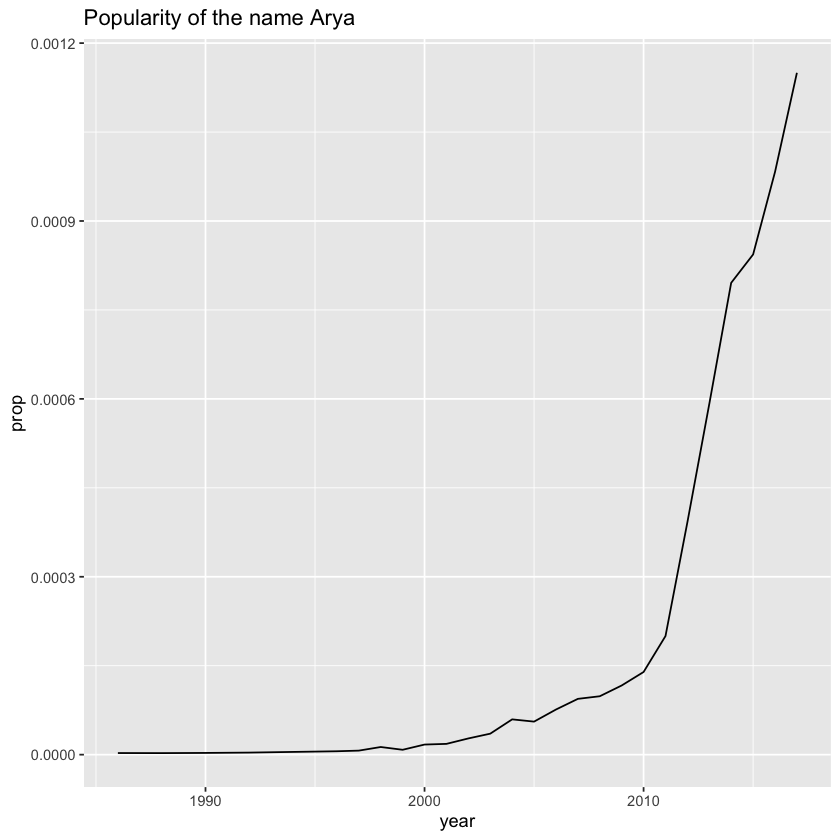

In [51]:
# Your answer here!

# START

arya_name <- babynames %>% 
  filter(name == "Arya", sex == "F") %>% 
  select(year, prop) 

ggplot(arya_name) +
    geom_line(aes(x = year, y = prop)) +
    labs(title = "Popularity of the name Arya")

# END

**5. Calculate for your name: (1) The total number of children that had your name, (2) The maximum number of kids with that name in a single year, (3) The mean number of kids named that per year, and (4) The first time a kid was named that in this dataset.**

In [111]:
# Your answer here!

# START

babynames %>% 
  filter(name == "Guillermo", sex == "M") %>% 
  summarise(total = sum(n), max=max(n), mean=mean(n), year=first(year))

#END

total,max,mean,year
<int>,<int>,<dbl>,<dbl>
29698,693,253.8291,1885


**6. Our first measure of *popularity* is the total number of children of a single gender given a name. Display the ten more popular names and the proportion of times a kid received that name.**

In [114]:
# Your answer here!

# START

babynames %>%
    group_by(sex,name) %>%
    summarise(total = sum(n)) %>%
    mutate(prop=total/sum(total)) %>%
    arrange(desc(total)) %>%
    head(10)

#END

`summarise()` has grouped output by 'sex'. You can override using the `.groups`
argument.


sex,name,total,prop
<chr>,<chr>,<int>,<dbl>
M,James,5150472,0.02930577
M,John,5115466,0.02910659
M,Robert,4814815,0.02739591
M,Michael,4350824,0.02475583
F,Mary,4123200,0.02392049
M,William,4102604,0.02334348
M,David,3611329,0.02054817
M,Joseph,2603445,0.01481339
M,Richard,2563082,0.01458373


**7. Under the second definition, a name is *popular* if it consistently ranks among the top names from year to year. Display the ten most popular names.**

In [112]:
# Your answer here!

# START

babynames %>% 
    group_by(year, sex) %>% 
    mutate(rank = min_rank(desc(prop))) %>%
    group_by(name, sex) %>%
    summarise(score = median(rank)) %>% 
    arrange(score) %>%
    head(10)

# END

`summarise()` has grouped output by 'name'. You can override using the
`.groups` argument.


name,sex,score
<chr>,<chr>,<dbl>
Mary,F,1.0
James,M,3.0
John,M,3.0
William,M,4.0
Robert,M,6.0
Michael,M,7.5
Charles,M,9.0
Elizabeth,F,10.0
Joseph,M,10.0


# Exercise 2 - Dplyr functions

[Download the data using this link.](https://docs.google.com/spreadsheets/d/1OaSj9w7Kg9FX4gsPZNH119EUaP_1Ndgy/edit?usp=sharing&ouid=114565474064234702477&rtpof=true&sd=true)

**0. Upload the Excel file WEO-2018.xlsx to Google Colab and use read_excel to read its first worksheet as a new table called weo_data. Examine the first 10 rows of the data.**

In [1]:
library(tidyverse)
library(readxl)

# Your answer here!

# START
weo_data <- read_excel(path = "WEO-2018.xlsx", sheet = 1)
head(weo_data, 10)
# END  

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



country,continent,pop_1992,pop_1993,pop_1994,pop_1995,pop_1996,pop_1997,pop_1998,pop_1999,⋯,rgdp_2014,rgdp_2015,rgdp_2016,rgdp_2017,rgdp_2018,rgdp_2019,rgdp_2020,rgdp_2021,rgdp_2022,rgdp_2023
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,Asia,NA,NA,NA,NA,NA,NA,NA,NA,⋯,59596.317,60376.08,61804.471,63353.223,64937.072,66873.761,69202.210,71958.867,75185.01,78933.867
Albania,Europe,3.217,3.201,3.137,3.141,3.168,3.148,3.129,3.109,⋯,29830.976,30500.45,31522.827,32763.064,33977.362,35265.949,36628.799,38064.609,39562.10,41118.684
Algeria,Africa,26.271,26.894,27.496,28.060,28.566,29.045,29.507,29.965,⋯,527682.945,547207.20,565261.451,576494.308,594015.951,610220.917,621442.475,628288.457,632470.09,635419.898
Angola,Africa,13.459,13.863,14.279,14.707,15.148,15.603,16.071,16.553,⋯,168445.315,173500.40,172089.667,173326.726,177077.960,181350.897,187947.539,195907.567,205214.15,215197.671
Antigua and Barbuda,North America,0.062,0.063,0.065,0.067,0.068,0.070,0.072,0.074,⋯,1927.521,2006.99,2115.322,2174.303,2250.925,2318.715,2376.677,2423.931,2471.85,2520.443
Argentina,South America,33.420,33.917,34.353,34.779,35.196,35.604,36.005,36.399,⋯,807956.578,830014.09,814885.003,838220.552,854593.203,882072.338,909620.490,938666.874,969221.80,1001203.869
Armenia,Asia,3.450,3.370,3.290,3.220,3.170,3.140,3.110,3.090,⋯,23151.200,23902.74,23971.259,25761.791,26635.561,27565.600,28537.651,29591.179,30772.36,32000.697
Australia,Oceania,17.557,17.719,17.893,18.120,18.330,18.510,18.706,18.919,⋯,1055467.357,1081552.36,1110171.577,1135362.364,1168997.672,1205032.610,1239882.125,1272710.104,1305889.54,1339640.053
Austria,Europe,7.799,7.883,7.929,7.948,7.959,7.968,7.977,7.992,⋯,379399.644,383560.32,389112.448,400410.321,410984.382,418965.064,425281.137,431655.080,438135.27,444685.649


In [ ]:
xx

# Exercise 3: Bayes rule

Suppose that you are interested in testing the performance of a new spam filter. This filter analyzes incoming emails and quarantines those that are assessed as potential spam. Emails can either be spam (S) or not spam (NS), and the filter can either move emails to a separate folder for quarantine (Q) or leave them in the main inbox folder (NQ). Assume that the test has a sensitivity (P(Q|S)) of 80% and a specificity (P(NQ|NS) of 95%, and suppose that the typical proportion of email that is spam is 10%. 

**a. Imagine that you are asked to evaluate the performance of the spam filter by calculating its *positive predictive value* (the probability that an email is spam given that the filter placed it in quarantine). Calculate P(S|Q).**

`Your answer here!`

##### START

Below is the information that we were given: 

\begin{align*}
P(Q|S) &= 0.8 \\
P(NQ│S) &= 1-0.8=0.2 \\
P(NQ│NS) &= 0.95 \\
P(Q│NS) &= 1- 0.95 =0.05 \\
P(S) &= 0.1 \\
P(NS) &= 1-0.1 = 0.9
\end{align*}

We will use two approaches to solve this question: the first one is filling a 2x2 probability table and the second one consists on applying the Bayes Rule formula. Let's start with approach 1. We want to fill the table below with joint probabilities:


|  | Spam | Not Spam | Row sums
| --- | --- | --- | --- 
| Q | P(Q \& S)  |  P(Q \& NS) | P(Q)
| NQ | P(NQ \& S) |  P(NQ \& NS) | P(NQ)
| Col sums | P(S) |  P(NS)  | 1 

Let’s calculate all 4 joint probabilities and fill the table:
\begin{align*}
P(Q \& S) &= P(Q | S ) * P(S)=0.8 * 0.1 =0.08 \\
P(Q \& NS) &= P(Q | NS) * P(NS) = (1-0.95) * 0.9 = 0.045 \\
P(NQ \& S) &= P(NQ | S) * P(S) = (1-0.8) * 0.1 = 0.02 \\ 
P(NQ \& NS) &= P(NQ | NS) * P(NS) = 0.95 * 0.9 =0.855
\end{align*}

|  | Spam | Not Spam | Row sums
| --- | --- | --- | --- 
| Q | 0.08  |  0.045 | 0.125
| NQ | 0.02 |  0.855 | 0.875
| Col sums | 0.10 |  0.90  | 1 

The question tells us that the filter placed the email in quarantine, so we know this case falls in either the top left or top right quadrants of the table. Now we calculate the probability of spam, given that the filter put the email in quarantine: 
\begin{align*}
P(S |Q) &=  \frac{P(Q \& S)}{P(Q)}  \\
 &=  \frac{\text{top left quadrant}}{\text{top left quadrant + top right quadrant}}  \\
 &=  \frac{0.08}{0.08+0.045}  = 0.640
\end{align*}

Alternatively, we can directly apply Bayes Rule (approach 2):

\begin{align*}
P(S│Q) &= \frac{P(Q \& S)}{P(Q)} \\
        &= \frac{P(Q \& S)}{P(Q \& S)+P(Q \& NS)} \\
        &= \frac{P(Q│S)*P(S)}{P(Q│S)*P(S)+P(Q│NS)*P(NS)} \\
        &= \frac{0.8 * 0.1}{0.8 * 0.1+(1-0.95) * 0.9}  = 0.640
\end{align*}

##### END

**b. Calculate the probability that an email is not spam if the email was not placed in quarantine: P(NS|NQ).**

`Your answer here!`

##### START

Using the information from the table, we calculate: 

\begin{align*}
P(NS |NQ) &=  \frac{P(NQ \& NS)}{P(NQ)}  \\
 &=  \frac{\text{bottom right quadrant}}{\text{bottom left quadrant + bottom right quadrant}}  \\
 &=  \frac{0.855}{0.02+0.855}  = 0.977
\end{align*}

##### END

# Exercise 4: Discrete random variables

The number of tornadoes in a year is a random variable with the probability distribution given below.

| Number of tornadoes | Probability
| --- | ---
| 0 | 0.850
| 1 | 0.100
| 2 | 0.030
| 3 | 0.015
| 4 | 0.005
| 5 or more | 0


**1. Calculate the expected number of tornadoes in a year.**

`Your answer here!`

##### START

For a discrete random variable $X$, its expected value can be calculated as $E[X] = \sum x \cdot p(x)$. In this case, the expected number of tornadoes in a year is equal to 0.225.

##### END

**2. What is the expected number of tornadoes in 10 years?**

`Your answer here!`

##### START

Let $X_t$ be a discrete random variable for the number of tornadoes in year *t*. Then the number of tornadoes in 10 years is $Y = X_1 + X_2 + ... + X_{10}$. By **linearity of expectations**, the expectation of a sum is equal to the sum of expectations:

\begin{align*}
E[Y] &= E[X_1 + X_2 + ... + X_{10}] \\
     &= E[X_1] + E[X_2] + ... + E[X_{10}] \\
     &= 10 \times E[X_t] \\
     &= 10 \times 0.225 \\
     &= 2.25
\end{align*}

We would expect the city to be affected by 2.25 tornadoes in 10 years.

##### END

**3. What is the probability of being affected by at least one tornado in 10 years?**

#### Your answer here!

##### START
The probability of any tornadoes in 10 years is equal to 1 minus the probability of no tornadoes in 10 years, which is easier to calculate.

$$\Pr(\mbox{Any Tornadoes}) = 1 - \Pr(\mbox{No Tornadoes})$$

If we assume that tornado risk is independent across years (e.g. exposure to a tornado in year 1 is unrelated to exposure in year 2, 3, 4, ...) then we can write the probability of no tornadoes in 10 years as the following:

$$\Pr(\mbox{No Tornadoes}) = 0.85^{10} = 0.197$$

From the first equation, the answer is 80\%:

$$\Pr(\mbox{Any Tornadoes}) = 1 - 0.197 = 0.803$$
##### END

**4. These calculations can also be obtained in R through simulation. Read the code below.**

In [105]:
# Expected number of tornadoes in ayera
num_tornadoes <- c(0, 1, 2, 3, 4, 5)
p <- c(.85, .1, .03, .015, .005, 0)
sum(num_tornadoes*p)

[1] 0.225

In [106]:
# Expected number of tornadoes in a year (simulation)
mean(sample(num_tornadoes,10000, prob = p, replace = TRUE))

[1] 0.2344

In [108]:
# Expected number of tornadoes in 10 years (simulation)
mean(replicate(10000,sum(sample(num_tornadoes,10, prob = p, replace = TRUE))))

[1] 2.2439

In [109]:
# Prob at least one tornado in 10 years
mean(replicate(10000,sum(sample(num_tornadoes,10, prob = p, replace = TRUE)))>0)

[1] 0.8008

# Exercise 5: Continuous random variables + decision tree

In [ ]:
xx rainfall, etc.